## 01 - Introdução

O objetivo deste material é conduzir o aluno no primeiro experimento com a leitura dos dados usando Pandas e na criação de regras induzidas a partir de raciocínio.

In [2]:
# lembre-se de fazer o upload do arquivo iris.csv antes de executar as células

import pandas as pd
iris = pd.read_csv('iris.csv')

In [3]:
# para visualizar o formato do dataset, use o comando a seguir
print(iris.shape)

(150, 5)


In [4]:
# para visualizar as estatísticas básicas do dataset, use o comando a seguir
iris.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# para visualizar o nome das colunas do dataset, use o comando a seguir
print(iris.columns)

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'classe'],
      dtype='object')


In [6]:
# para visualizar a coluna classe, use o comando a seguir
print(iris.classe)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classe, Length: 150, dtype: object


In [7]:
# para visualizar o primeiro registro, use o comando a seguir
iris.values[0]

array([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], dtype=object)

### Classificação

Vamos encontrar uma ou mais regras para identificar as espécies das flores e validar se a regra está funcionando bem.

In [8]:
# primeiro, vamos criar uma coluna para colocar nossas respostas das regras

iris['predicao'] = ''
print(iris.shape)

(150, 6)


In [31]:
irisSetosa = iris[iris['classe'] == 'Iris-setosa']
irisVersicolor = iris[iris['classe'] == 'Iris-versicolor']
irisVirginica = iris[iris['classe'] == 'Iris-virginica']


# print(irisVersicolor.to_string())
# print(irisVersicolor['comprimento_petala'].max())
# print(irisVersicolor['largura_petala'].max())
# print(irisVersicolor['comprimento_sepala'].max())
# print(irisVersicolor['comprimento_sepala'].min())

print('\n')
print(irisVirginica['largura_petala'].min())
print(irisVirginica['largura_petala'].max())
print(irisVirginica['largura_sepala'].min())
print(irisVirginica['largura_sepala'].max())
print(irisVirginica['comprimento_petala'].min())
print(irisVirginica['comprimento_petala'].max())
print(irisVirginica['comprimento_sepala'].min())
print(irisVirginica['comprimento_sepala'].max())




1.4
2.5
2.2
3.8
4.5
6.9
4.9
7.9


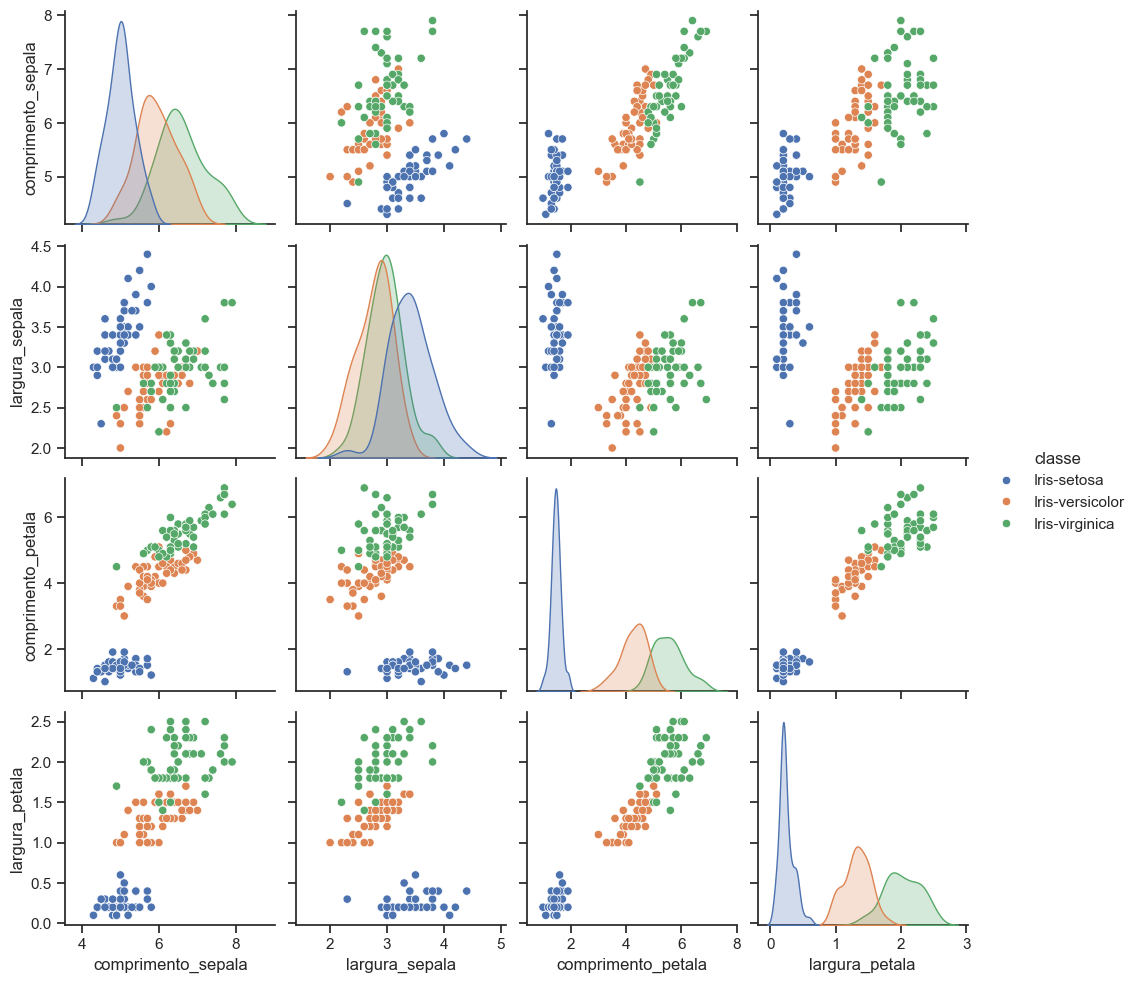

In [17]:
import seaborn as sns
sns.set_theme(style="ticks")

# df = sns.iris
sns.pairplot(iris, hue="classe")


In [43]:
#mean

meanColumn = (iris['comprimento_petala'] + iris['comprimento_sepala'] + iris['largura_sepala'] + iris['largura_petala']) / 4

# Cria um novo DataFrame com a média e a classe
result = pd.DataFrame({
    'meanColumn': meanColumn,
    'classe': iris['classe']
})

irisSetosa = result[result['classe'] == 'Iris-setosa']
irisVersicolor = result[result['classe'] == 'Iris-versicolor']
irisVirginica = result[result['classe'] == 'Iris-virginica']

print(irisSetosa.min(), irisSetosa.max())
print(irisVirginica.min(), irisVirginica.max())
print(irisVersicolor.min(), irisVersicolor.max())

meanColumn            2.1
classe        Iris-setosa
dtype: object meanColumn            3.0
classe        Iris-setosa
dtype: object
meanColumn               3.4
classe        Iris-virginica
dtype: object meanColumn               5.1
classe        Iris-virginica
dtype: object
meanColumn              2.875
classe        Iris-versicolor
dtype: object meanColumn                4.1
classe        Iris-versicolor
dtype: object


In [ ]:
#mean

meanComp = (iris['comprimento_petala'] + iris['comprimento_sepala'])/2
meanLarg = (iris['largura_petala'] + iris['largura_sepala'])/2

# Cria um novo DataFrame com a média e a classe
result = pd.DataFrame({
    'meanComp': meanComp,
    'meanLarg': meanLarg,
    'classe': iris['classe']
})

irisSetosa = result[result['classe'] == 'Iris-setosa']
irisVersicolor = result[result['classe'] == 'Iris-versicolor']
irisVirginica = result[result['classe'] == 'Iris-virginica']

print(irisSetosa.min(), irisSetosa.max())
print(irisVirginica.min(), irisVirginica.max())
print(irisVersicolor.min(), irisVersicolor.max())

In [32]:
# adapte ou adicione novas regras, e execute novamente essa célula
iris['predicao'][iris['largura_petala'] < 1] = 'Iris-setosa'
iris['predicao'][(iris['largura_petala'] >= 1) & (iris['largura_petala'] <= 1.8) & (iris['comprimento_petala'] <= 5.1) & (iris['comprimento_sepala'] <= 7) & (iris['comprimento_sepala'] <= 7)] = 'Iris-versicolor'
iris['predicao'][(iris['largura_petala'] >= 1.4) & (iris['largura_petala'] <= 2.5) & (iris['comprimento_petala'] >= 4.5) & (iris['comprimento_sepala'] >= 4.9) ] = 'Iris-virginica'
print(iris.to_string())

     comprimento_sepala  largura_sepala  comprimento_petala  largura_petala           classe         predicao
0                   5.1             3.5                 1.4             0.2      Iris-setosa      Iris-setosa
1                   4.9             3.0                 1.4             0.2      Iris-setosa      Iris-setosa
2                   4.7             3.2                 1.3             0.2      Iris-setosa      Iris-setosa
3                   4.6             3.1                 1.5             0.2      Iris-setosa      Iris-setosa
4                   5.0             3.6                 1.4             0.2      Iris-setosa      Iris-setosa
5                   5.4             3.9                 1.7             0.4      Iris-setosa      Iris-setosa
6                   4.6             3.4                 1.4             0.3      Iris-setosa      Iris-setosa
7                   5.0             3.4                 1.5             0.2      Iris-setosa      Iris-setosa
8         

C:\Users\est.pedrogs\AppData\Local\Temp\ipykernel_36924\3471307180.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  iris['predicao'][iris['largura_petala'] < 1] = 'Iris-setosa'
C:\Users\est.pedrogs\AppData\Local\Temp\ipykernel_36924\34713

In [33]:
# as seguintes instruções verificam quantos acertos foram obtidos com as regras

print("Acurácia Geral")
print((iris['classe'] == iris['predicao']).sum() / len(iris))

for classe in list(iris['classe'].unique()):
  print("Acurácia da classe", classe)
  aux = iris[iris['classe'] == classe]
  print((aux['classe'] == aux['predicao']).sum() / len(aux))


Acurácia Geral
0.88
Acurácia da classe Iris-setosa
1.0
Acurácia da classe Iris-versicolor
0.64
Acurácia da classe Iris-virginica
1.0


### Avaliando os dados por classe para entender as distribuições

In [ ]:
# avaliando o conjunto Iris-setosa

setosa = iris[iris['classe'] == 'Iris-setosa']
setosa.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
# avaliando o conjunto Iris-virginica

virginica = iris[iris['classe'] == 'Iris-virginica']
virginica.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [ ]:
# avaliando o conjunto Iris-versicolor

versicolor = iris[iris['classe'] == 'Iris-versicolor']
versicolor.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


### Exercício 1

Utilize como referência os códigos das células anteriores para criar as regras e avaliar a acurácia do modelo criado por vocês. Nosso objetivo é atingir mais de 60% de acurácia geral.

1.   Lembre de limpar a coluna predição;
2.   Monte a regra igual apresentado;
3.   Depois utilize o código para avaliar a acurácia.